<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
 Final Project -Programming for  Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  TOPIC: ANALYSIS ON GOOGLE PLAY STORE APP
</div>

<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Stage 2: Exploration Data Analysis
</div>

## TABLE OF CONTENT:
>[ 1. Import Library](#1.-Import-Library)  
>[ 2. Exploring your data](#2.-Exploring-your-data)  
>[ 3. Solving questions](#3.-Solving-questions)
>>[Question 01: How to create a high-rating App on Play Store?](#Question-01:-How-to-create-a-high-rating-App-on-Play-Store?)  
>> [Question 02: What differences exist within the market for paid and free apps?](#Question-02:-What-makes-an-app-require-payment-to-use-when-there-are-free-apps?)

>[4. Reflection](#4._Reflection)  
>[5. References](#5._References)  
 

## 1. Import Library

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(15,8)})
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Statistical analysis libraries
import scipy.stats as stats

# Natural language processing libraries
from sklearn.feature_extraction.text import CountVectorizer

# Miscellaneous libraries
import warnings
warnings.filterwarnings('ignore')

## 2. Exploring your data

### Read cleaned data from file

We can now use the cleaned dataset for analysis. Thus, we first read the CSV files we created in the previous pre-processing task.

In [2]:
# YOUR CODE HERE
df = pd.read_csv("../Data/Processed/cleaned_apps.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,2018-06-20



<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 10px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0">
  Columns descriptions:
</div>


| Column | Meaning |
| --- | --- |
| **App** | Name of the app |
| **Category** | Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc. |
| **Rating** | The current average rating (out of 5) of the app on Google Play |
| **Reviews** | Number of user reviews given on the app |
| **Size** | Size of the app in MB (megabytes) |
| **Installs** | Number of times the app was downloaded from Google Play |
| **Type** | Whether the app is paid or free |
| **Price** | Price of the app in US$ |
| **Content Rating** | Subject the app aim to |
| **Last Updated** | Date on which the app was last updated on Google Play |
<!-- | **Android Ver** | The configuration that devices need in order to work properly | -->

**Content:** Each app (row) has values for catergory, rating, size, and more.

### Numerical analysis using descriptive statistics

**Check for NaN in the dataset**

In [3]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
dtype: int64

In [4]:
df = df.dropna()

**Check for duplicate in the dataset**

In [5]:
df.duplicated().sum()

0

**Check datatype**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 754.7+ KB


In [7]:
print('Number of apps in the dataset : ' , len(df))
df.sample(7)

Number of apps in the dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated
1487,Master of Eternity(MOE),GAME,4.200000,5829,70.0,100000,Free,0.00,Teen,2018-07-26
3953,Chatime AB Rewards,FAMILY,4.179664,9,22.0,1000,Free,0.00,Everyone,2018-06-22
7411,DK Studio Barbershop,BEAUTY,4.278571,8,17.0,100,Free,0.00,Everyone,2018-03-20
1001,Easy Healthy Recipes,FOOD_AND_DRINK,4.100000,278,7.2,50000,Free,0.00,Everyone,2018-07-20
8141,Marítimo EC,TOOLS,4.039554,1,5.3,10,Free,0.00,Everyone,2018-02-14
7728,PhotoFrame for Synology DS,PHOTOGRAPHY,4.000000,1,2.6,10,Paid,4.99,Everyone,2017-02-02
8053,Plants vs. Zombies™ Watch Face,FAMILY,3.500000,33178,3.1,1000000,Free,0.00,Everyone,2015-02-02


**Descriptive statistics show the characteristics of numerical features:**


In [8]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.172230,2.165926e+05,19.439002,7.777507e+06,1.099299
std,0.495593,1.831320e+06,20.761937,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,5.050000,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,11.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


**OBSERVATION**: 
No improper value found in the above table.

### Describe the correlation between features in the dataset

Considering the available features within the training dataset, we want to identify and analyse the relationships between them, and then determine which features within the dataset significantly contribute to our solution goal.

Text(0.5, 1.0, 'Correlation matrix between numerical data of the Apps')

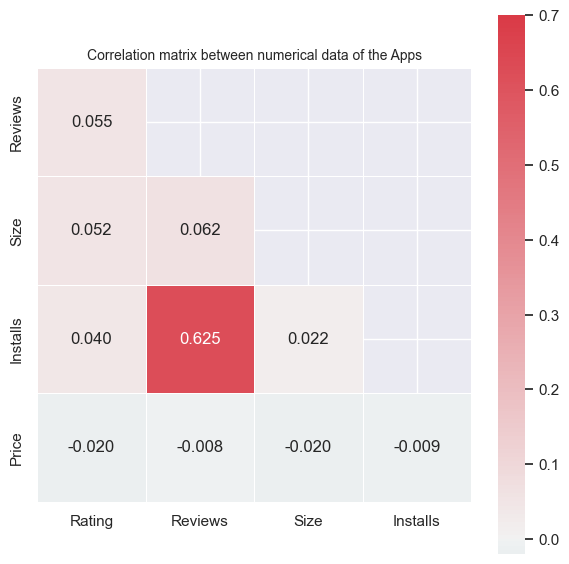

In [9]:
#Select value from corr matrix
df_chart = df.select_dtypes(include = ['int64','float64'])
corr = df_chart.corr()
mask = np.zeros_like(corr, dtype= 'bool')
mask[np.triu_indices_from(mask)] = True
adjust_corr = corr.iloc[1:,:-1]
mask = mask[1:,:-1]

# chart
fig , ax = plt.subplots(1,1,figsize=(7, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(adjust_corr, mask=mask, vmax=.7, center=0,cmap = cmap ,square=True, linewidths=.5, annot = True, fmt='.3f' )
ax.set_title("Correlation matrix between numerical data of the Apps", loc = "center", fontsize = 10)

**OBSERVATION**
- There is a strong positive correlation between **Installs** and **Reviews** (0.625). This is a reasonable relationship because the more people install and use a piece of software, the more reviews there will be for that product.
- The others correlation is quite faint to bring under consideration.

In [10]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION) 

## 3. Solving questions

### **Question 01**: How to create a high-rating App on Play Store?

**Why we need to answer this question?**  
> Having a high rating on the Google Play Store can be beneficial for an app in several ways. Firstly, apps with higher ratings are more likely to appear in top charts and recommended lists on the Google Play Store, which can lead to more downloads and exposure to potential users. Secondly, a high rating instills confidence in potential users, who are more likely to trust and download an app with positive reviews and a high overall rating. Thirdly, users often read reviews before downloading an app. Positive reviews and a high rating can encourage users to take the next step and download your app, leading to higher conversion rates. Fourthly, in a crowded app marketplace, a high rating can give your app a competitive edge. Moreover, reviews and ratings can provide valuable insights into what users like or dislike about your app. If you would like to learn more about how to optimize your app for the Google Play Store.

**How to answer this question?**  
>**Step 1:** Preprocessing and getting some descriptive statistics to have general on world's application market.  
**Step 2:** Analyzing which features contribute to the high-rating apps.  
**Step 3:** Summarize and give out final conclusion.  

#### STEP 1: Preprocessing and getting some descriptive statistics to have general on world's application market.

In [11]:
# PRE-PROCESSING IF NEEDED
# YOUR CODE HERE (OPTION)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [12]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()

**Get some desciptive statistics of `Rating` field**

In [13]:
df[['Rating']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9659.0,4.17223,0.495593,1.0,4.0,4.2,4.5,5.0


In [14]:
df[['Rating']].mode()

,Rating
0,4.3


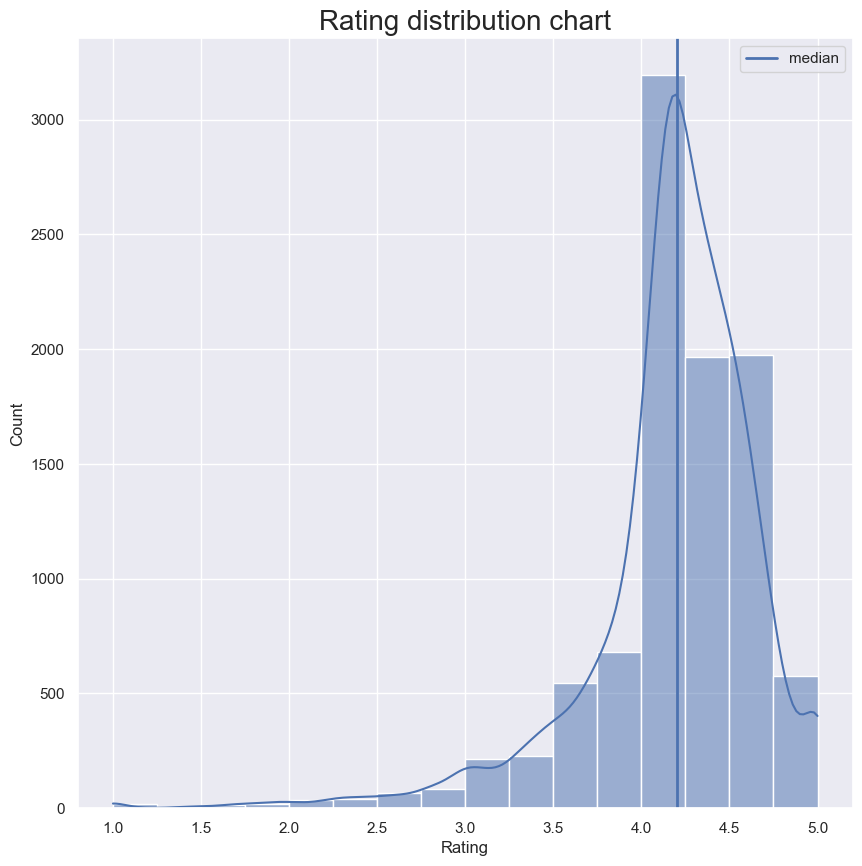

In [15]:
# Style
#sns.set(context="notebook", palette="ocean_r", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#Create
plt.figure(figsize = (10,10))
hist = sns.histplot(data=df, x="Rating", bins  = 16, kde = True)
plt.title("Rating distribution chart", fontsize = 20)

important_vals = df.Rating.quantile([0.5]).to_list()
labels = ["median"]

plt.axvline(important_vals[0], label = labels[0], linestyle='solid', linewidth=2)
plt.xticks()
plt.legend()
plt.show()


**OBSERVATION :**  
After drawing some charts, here are some conclusion I got: 
- The mean , median and mode are : 4.172172, 4.2 and 4.3. The fact that the mean is close to the median and mode suggests that the dataset may have a relatively normal or symmetric distribution( require further analysis). The fact that the mean, median, and mode are all clustered around the 4.2-4.3 range suggests that this is a central tendency of the dataset. It gives an idea of where the bulk of the values are concentrated.
- With the `Rating distribution chart` we found that there is a left skew distribution in `Rating` field. Rating values gradually increased an got peak at 4.0 - 4.25. Then drop strongly later.

**How the apps is distributed based on categories?**

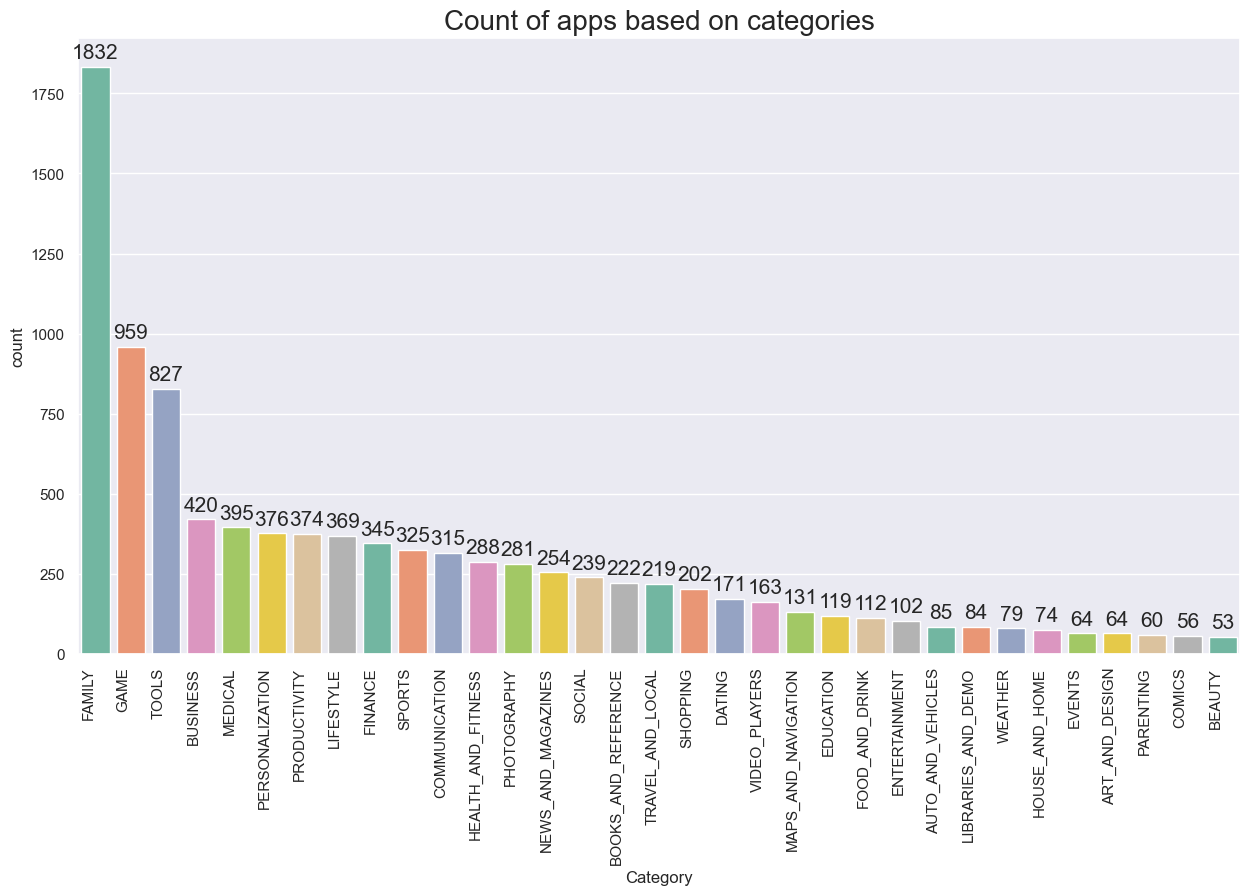

In [16]:
order = df['Category'].value_counts().index
ax = sns.countplot(x="Category", data=df, palette="Set2", order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set_title('Count of apps based on categories', size=20)

for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)

plt.show()


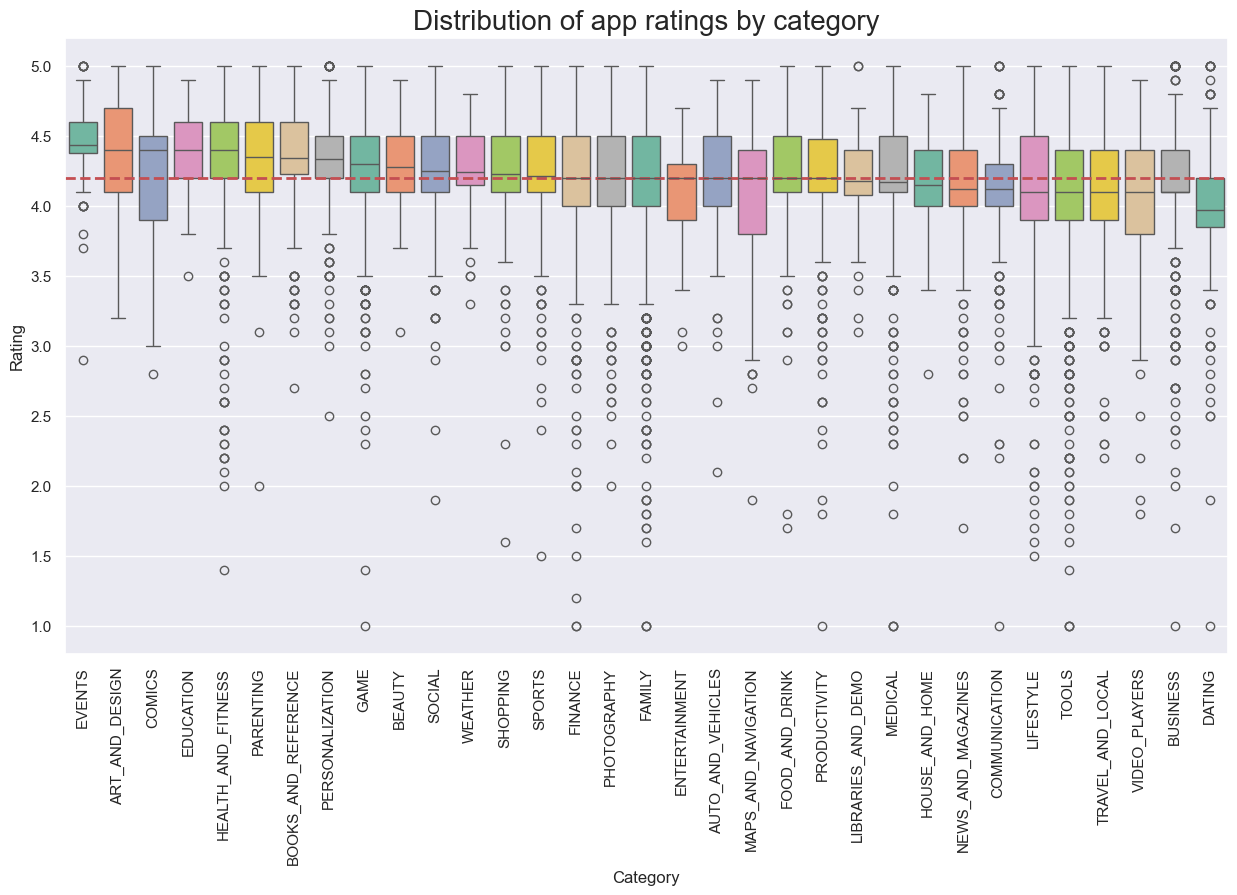

In [17]:
order = df.groupby('Category')['Rating'].median().sort_values(ascending=False).index
ax = sns.boxplot(y='Rating', x='Category', data=df, palette="Set2", order=order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribution of app ratings by category', size=20)

medians = df.groupby('Category')['Rating'].median().sort_values(ascending=False)
pos = range(len(medians))

plt.axhline(y= df.Rating.median(), color='r', linestyle='--',linewidth = 2)
plt.show();


**OBSERVATION :**  
- The `Count of apps based on genres` chart gives us some valuable information. **Famiy, Game and Tool** are the three categories which dominant the app market. On the other sight, **Event, Art and design, Parenting, Comics and Beauty** take quite percentage in the dataset. From these things, we can give our some hypothesis on people preference, attention and chance for application manufacture.
  1. People now have strong focus on application relating **Famiy, Game and Tool**. Creating an application in these fields could have higher probability to get puplic attention and success. However, the manufacturer will face fierce competition from competitors in the market.
  2. For **Event, Art and design, Parenting, Comics and Beauty** applications. Creating applications in these areas will likely receive little public attention. However, this can also create opportunities because there is less competition from competitors.
  3. The number of application can reflect high or low demand from peole. Low number of applications in an category don't mean people do not need them but It could mean the applications are good enough that they donot need more apps.  
- Finally, let's see what message 'Distribution of app ratings by category' chart convey us:
  1. Although **Event, Art and design, Parenting, Comics and Beauty** applications have little in amount but the median rating of these application get far high from the median of all the market.
  2. **Game** applications is the only one satisfy both the quantity and quality.
  3. **Family** applications is the safe choice.
  4. **Tools** have greate amount in quantity but many of them bring user poor experience.

#### STEP 2: Deeper analysis in High rate applications

In [18]:
## Preprocessing 
df_rating_5 = df[df.Rating == 5.].copy()
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()
df_rating_5_content_rating =  df_rating_5['Content Rating'].value_counts().reset_index()
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


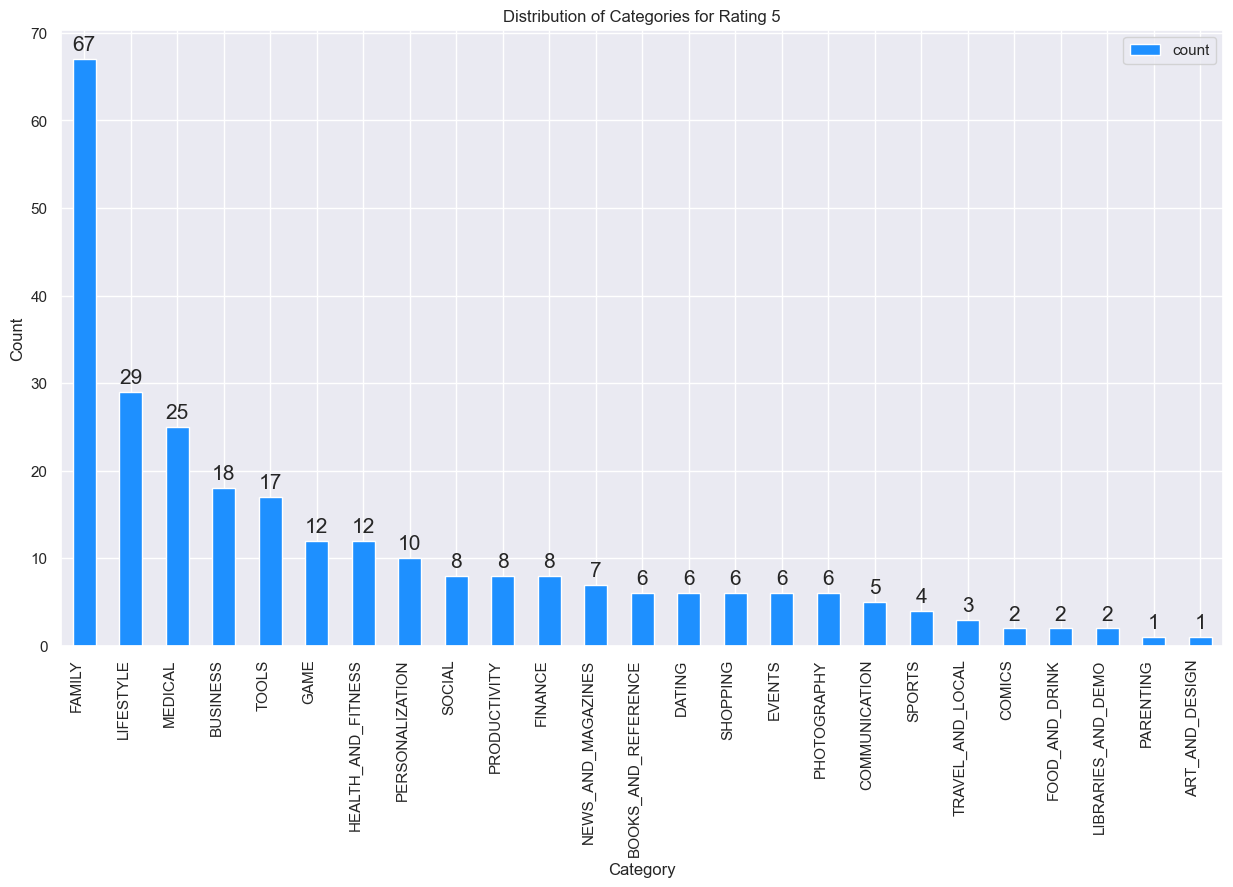

In [19]:
# # create a bar chart
ax = df_rating_5_cat.plot(kind='bar',  x='Category', y='count', rot= 90, color='dodgerblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for p in ax.patches:
     ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)
# add title and axis labels
plt.title('Distribution of Categories for Rating 5')
plt.xlabel('Category')
plt.ylabel('Count')

#show the plot
plt.show()

**OBSERVATION :**
- There still some familiar categories such as: **Family, Tools, Games, ..** which we have met in general analysis.
- However, we also see that some categories have strong revival, namely: **Lifestyle, Medical, Business, Health and  fitness,..**.

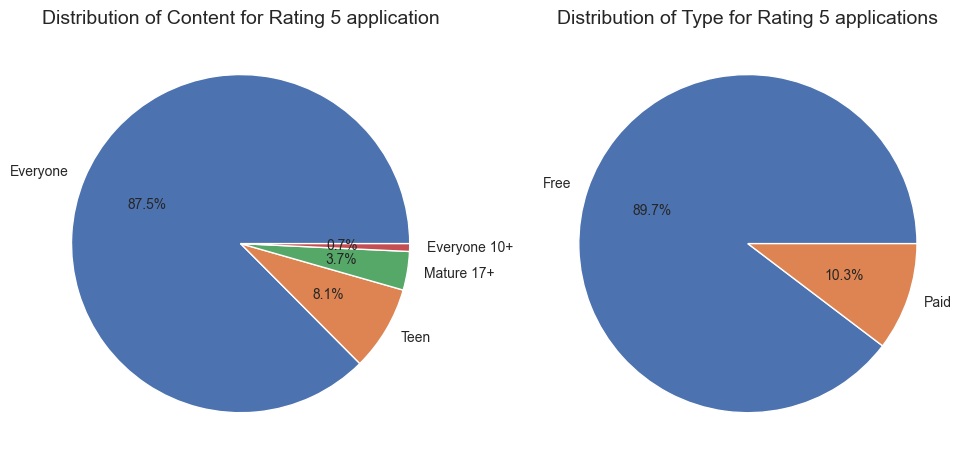

In [20]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# create the first pie chart
ax1.pie(df_rating_5_content_rating['count'], labels=df_rating_5_content_rating['Content Rating'], autopct='%1.1f%%', textprops={'fontsize': 10})
ax1.set_title('Distribution of Content for Rating 5 application',size = 14)

# # create the second pie chart
ax2.pie(df_rating_5_type['count'], labels=df_rating_5_type['Type'], autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.set_title('Distribution of Type for Rating 5 applications',size = 14)

# # show the plot
plt.show()

**OBSERVATION :**  
- Most of the High rating apps focus on the public. This is reasonable because the vast subject the app aim to also means that it is likely to contain some features such as: ease to use, simplicity, friendliness,... which are some importance citeria for an interesting app.
- An unsubprise information else is: People are appealing to free apps. Paid apps only account for 10.3% which tells that these app must have something extremely special enough that someone willing to pay for it. 

**Were those apps with high-rating still get updated?**

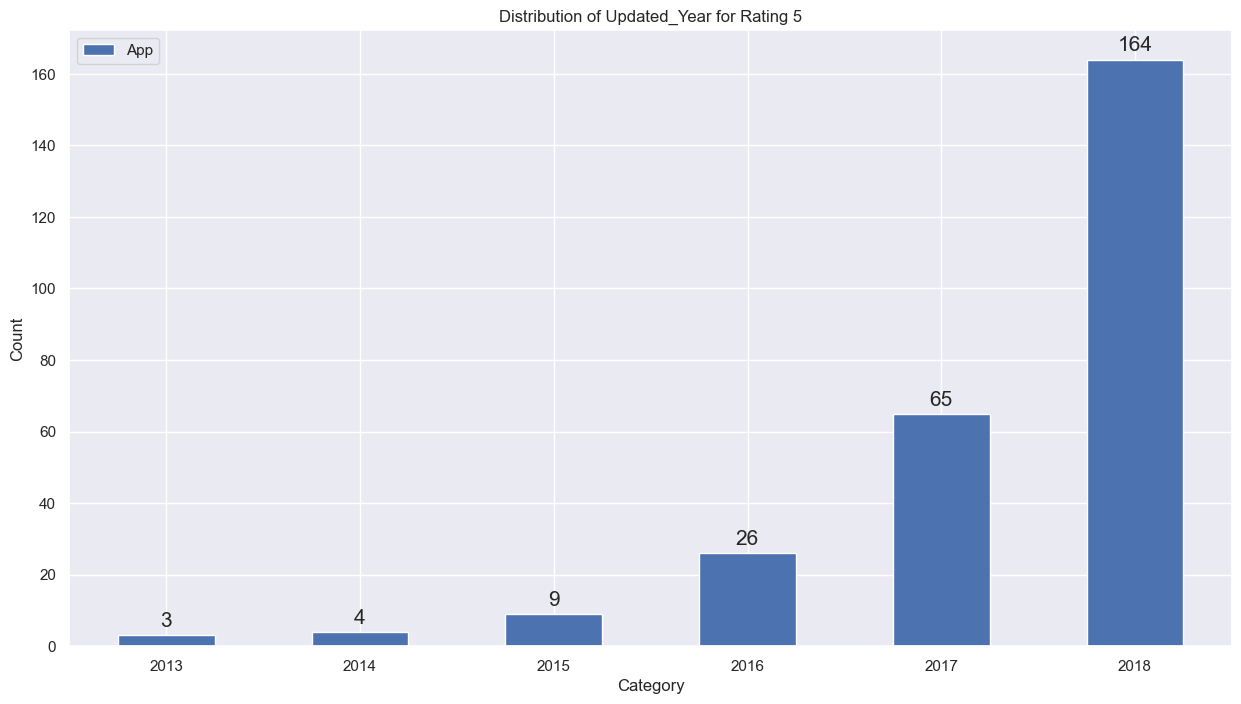

In [21]:
year = df_rating_5.groupby(["Updated_Year"]).count()
year = year.reset_index()
year = year.iloc[:,:2]
# create a bar chart
ax = year.plot(kind='bar', x='Updated_Year', y='App', rot= 0)
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords= 'offset points', size = 15)
# add title and axis labels
plt.title('Distribution of Updated_Year for Rating 5')
plt.xlabel('Category')
plt.ylabel('Count')

# show the plot
plt.show()

**OBSERVATION :**  
We can see some apps with `last update` years ago but they are not the typical situations. People prefer to using application which are still updated by the manufacturer. 


**Is the application's name important?**

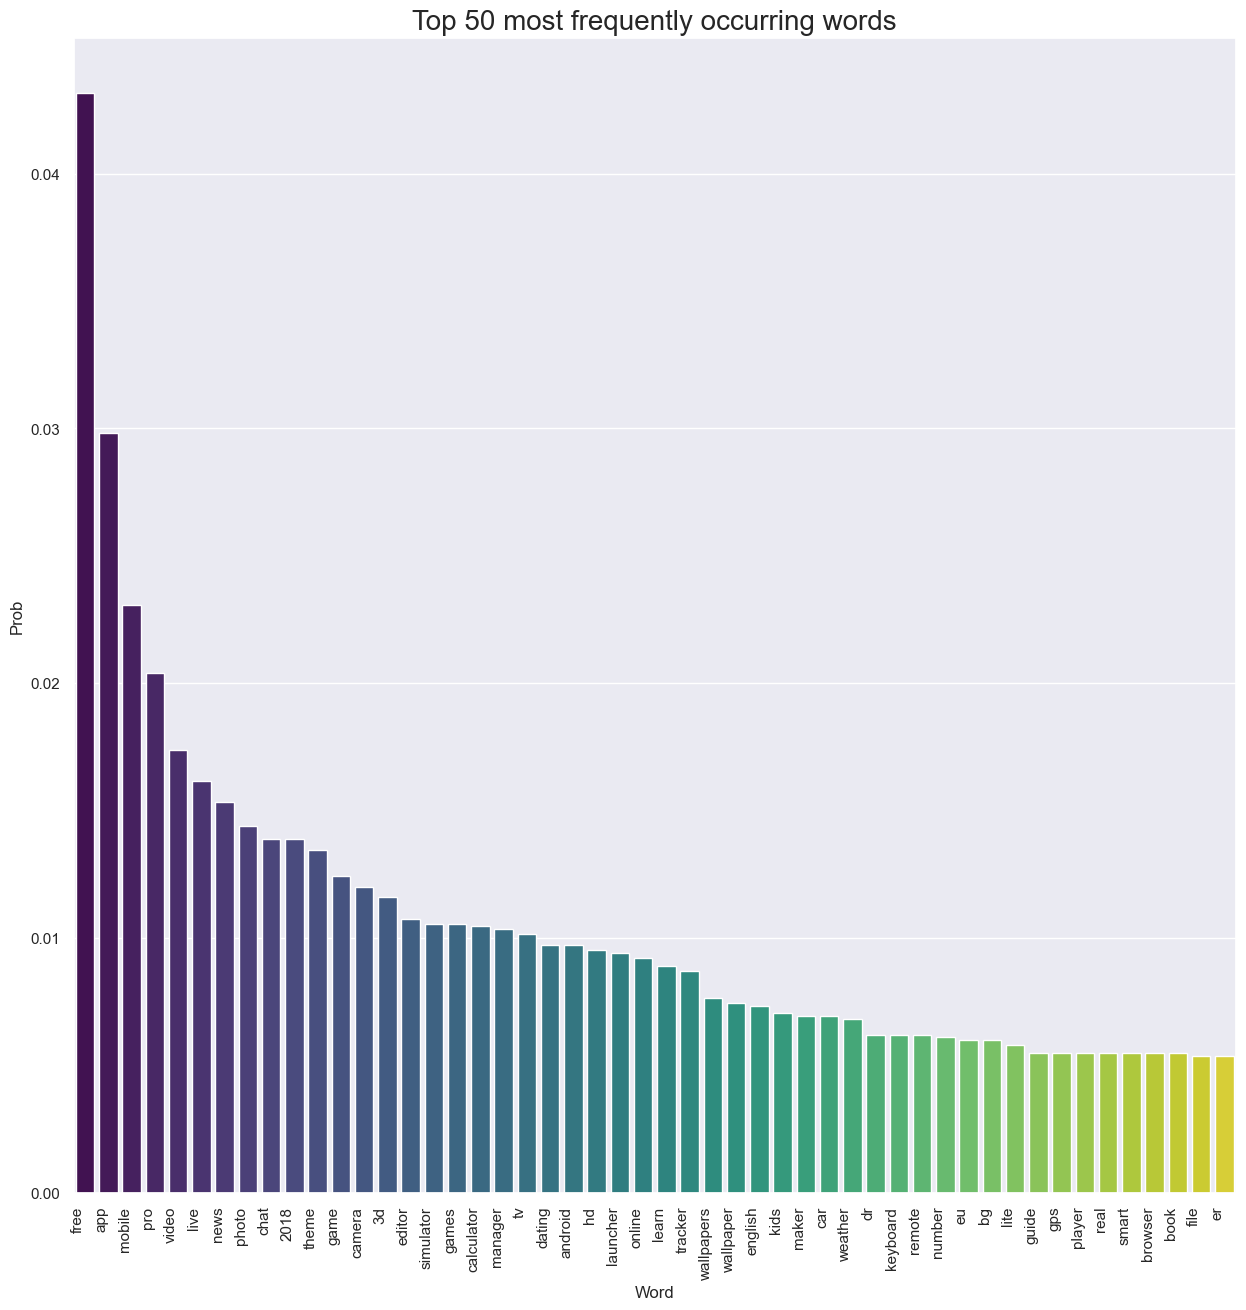

In [22]:
corpus = list(df['App'])
vectorizer = CountVectorizer(max_features=50, stop_words='english')
X = vectorizer.fit_transform(corpus)
names = vectorizer.get_feature_names_out()
values = X.toarray().mean(axis=0)
# Dataframe
word = pd.DataFrame([names,values])
word = word.T
word.columns = ['Word',"Prob"]
word = word.sort_values('Prob', ascending=False)
#Visualize
plt.figure(figsize=(15, 15))
sns.barplot(x= word.Word, y= word.Prob, palette="viridis")
plt.title('Top 50 most frequently occurring words', size=20)
plt.xticks(rotation=90, ha="right")
plt.show()

**OBSERVATION**
The name which the manufacture give to an app also somehow affect its whole life. In general, App with high rate often go with positve word such as: dating, learn,... or word express purpose of app such as mobile, video, live,... The word 'free' once again contribute to the success of an app.

#### STEP 3: SUMARIZE AND GIVE OUT CONCLUSION

- The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.

- The categories of the application  is an important that publisher must take into consideration:
  1. Although **Event, Art and design, Parenting, Comics and Beauty** applications have little in amount but the median rating of these application get far high from the median of all the market.
  2. **Game** applications is the only one satisfy both the quantity and quality.
  3. **Family** applications is the safe choice.
  4. **Tools** have greate amount in quantity but many of them bring user poor experience.
  5. **Lifestyle, Medical, Business, Health and  fitness** have moderate in quantity. However, people have a tendency to spend greater love for them.

- The applicaition aim to everyone occupy large percentage in high rating app.
- Free applications have higher probality to climb chart.
- User love up-to-date application.
- Name of an application will affect its life in some extent.


### **Question 02**: What differences exist within the market for paid and free apps?

**Why we need to answer this question?**

- **User Expectations**: Users want to know what they're paying for and why. Understanding this helps in setting transparent expectations for users.
- **Business Strategy**: For developers or companies creating apps, comprehending the factors behind payment helps in devising effective pricing strategies and monetization models.
- **Market Research**: It aids in conducting market research to identify user preferences and willingness to pay for certain features or services in an app.
- **Value Proposition**: Knowing why an app requires payment helps in communicating its value proposition more effectively to potential users.

**How to answer this question?**

We will compare the following factor between *paid* apps and *free* apps:
- The total download
- The rating of user
- The categories
- The user experience

Then we'll answer these sub-questions:
1. What is the number of *free* app vs *paid* app on the application market?
2. For *paid* apps and *free* apps, which categories are the most popular on Google Store? (finding number of apps and total download in each category)
3. What are the rating of users for these 2 type of apps?
4. How do users feel when using the paid apps vs free apps?
   
(*Deeper into paid app's market*)
   
5. What is the price range that most of the apps have?
6. What is the average price (given by sellers) in each categories?
7. Which apps generate the highest revenue?
8. What are the average prices that users're really willing to pay in each category?

Finally, giving out the finnal conclusion.

#### **Answer the question** 

First, we will look at **number of *free* app vs *paid* app on the application market**.

[Text(0, 0, '8903'), Text(0, 0, '756')]

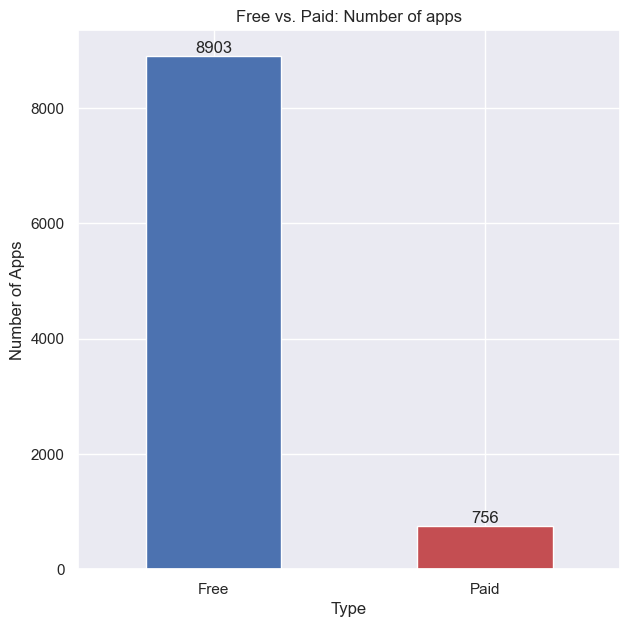

In [23]:
type_count = df.groupby('Type')['App'].count()

# visualizing
fig, ax = plt.subplots(figsize=(7, 7))
type_count.plot.bar(rot=0, ylabel='Number of Apps', title='Free vs. Paid: Number of apps', color=['b', 'r'], ax=ax)
ax.bar_label(ax.containers[0])

**Comment:** It is obviously that *free* apps occupies the majority of the application market.

**For *paid* apps and *free* apps, which categories are the most popular on Google Store?**

In [24]:
def draw_piechart(data, type, ax, factor): # function to draw pie chart
    fontsize = 7
    main_cat = data.loc[type].iloc[:9]
    others = data.loc[type].iloc[9:].sum()
    new_cat = pd.concat([main_cat, pd.Series(others, index=['Others'])])
    
    new_cat.plot.pie(ax=ax, autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None, 
                 pctdistance=0.82, fontsize=fontsize, title=f'{factor} ({type} apps)', colors=sns.color_palette('Paired'))
    
    ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=fontsize)

Number of FREE categories: 33
Number of PAID categories: 30
Categories that PAID apps do not have: {'HOUSE_AND_HOME', 'BEAUTY', 'COMICS'}


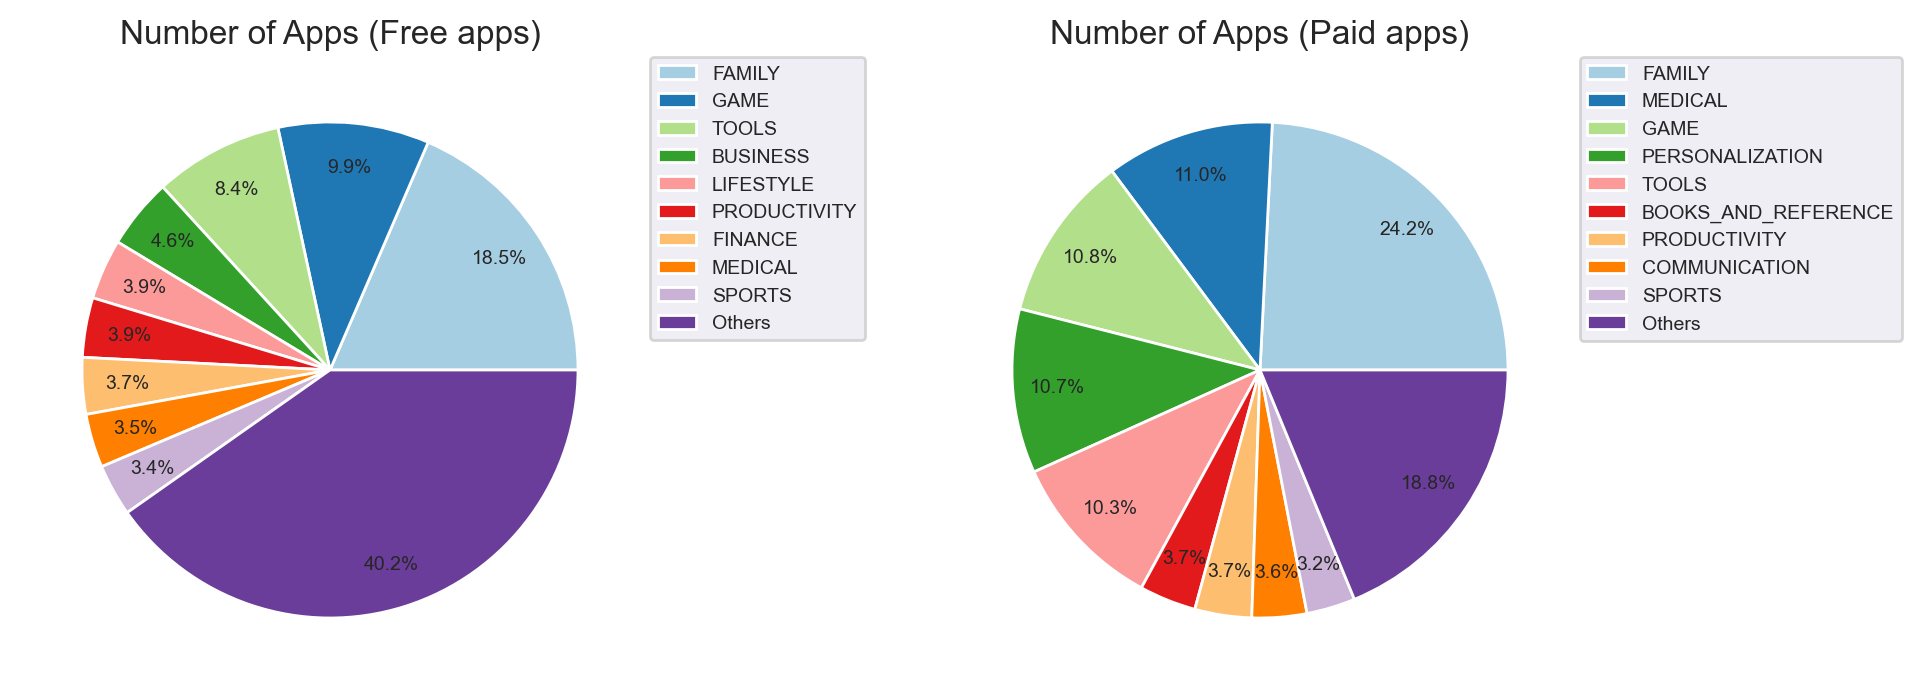

In [25]:
# pre-processing
num_type_cat = df.groupby(['Type', 'Category'])['App'].count().sort_values(ascending=False)
paid_categories = num_type_cat.loc['Paid'].index
free_categories = num_type_cat.loc['Free'].index
print(f'Number of FREE categories: {len(free_categories)}')
print(f'Number of PAID categories: {len(paid_categories)}')
print(f'Categories that PAID apps do not have: {set(free_categories) - set(paid_categories)}')

# visualizing
fig, axes = plt.subplots(1, 2, figsize=(10, 15), dpi=200)
fig.subplots_adjust(wspace=0.5)

draw_piechart(num_type_cat, 'Free', axes[0], 'Number of Apps')
draw_piechart(num_type_cat, 'Paid', axes[1], 'Number of Apps')

**Comment:** 

In the 2 charts, we can observe that:

- Among *free* apps, the leading five primary categories are **FAMILY**, **GAME**, **TOOLS**, **BUSINESS**, and **LIFESTYLE**. Since the majority of these apps are available at no cost, their primary categories align closely with the overall market trends.
- In *paid* apps, **FAMILY** also claims the top position, representing almost 25% of the total paid apps. Following behind, **MEDICAL** holds a significant 11% share. Together, these two categories account for 35%, which is larger than 1/3 the total number of *paid* apps, shows they are the top categories in paid application market. Additionally, **GAME**, **PERSONALIZATION**, and **TOOLS** each capture a similar share of around 10.5% on average due to their high demand among users.

Espeically, we also find out that the categories of *paid* app market do not include **HOUSE_AND_HOME**, **COMICS** and **BEAUTY**. A possible reason is the low demands of user at that time for those fields.

**Which categories has the most number of download?**

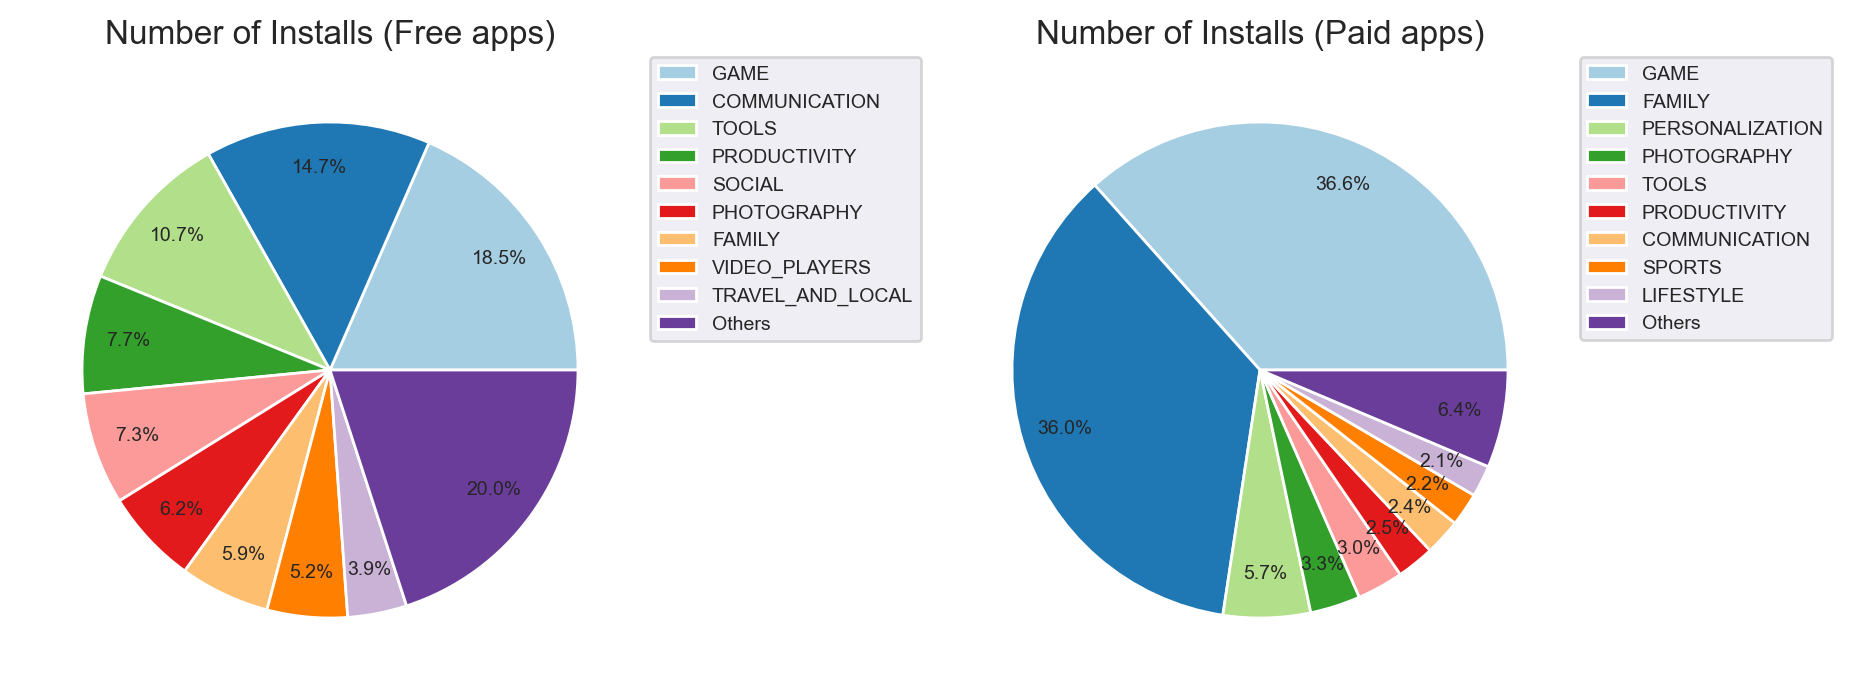

In [26]:
# pre-processing
install_type_cat = df.groupby(['Type', 'Category'])['Installs'].sum().sort_values(ascending=False)

# visualizing
fig, axes = plt.subplots(1, 2, figsize=(10, 15), dpi=200)
fig.subplots_adjust(wspace=0.5)
    
draw_piechart(install_type_cat, 'Free', axes[0], 'Number of Installs')
draw_piechart(install_type_cat, 'Paid', axes[1], 'Number of Installs')

**Comment:** 
- Surprisingly, despite the abundance of **FAMILY** apps, **GAME** apps claim the highest position in terms of installations across both markets. 

- In the section of *free* apps, **COMMUNICATION** apps may not take a spot in the top 5 categories, yet they remarkably get the second position concerning the number of downloads, underscoring the substantial demand for communication-related applications. This also present the dominance of a few apps that have monopolized the **COMMUNICATION** market.

- In the section of *paid* apps, **GAME** and **FAMILY** together occupies for nearly 73% of the total downloads, underscoring the immense demand for these two categories among users.

**What are the rating of users for these 2 type of apps?**

Text(0.5, 1.0, 'Free vs. Paid: User Rating')

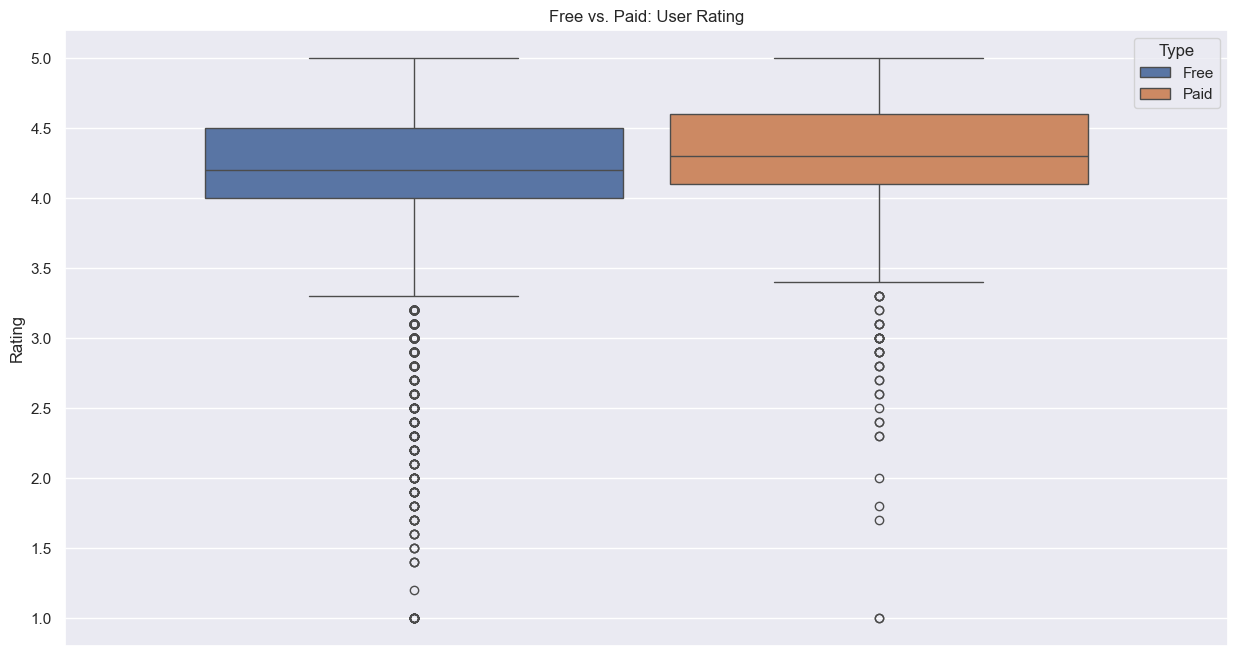

In [27]:
# visualizing
sns.boxplot(data=df, y='Rating', hue='Type', gap=0.1).set_title('Free vs. Paid: User Rating')

**Comment:** In general, the two boxplots representing two distinct app types exhibit remarkable similarity. Notably, the **Interquartile Range (IQR)** for *paid* apps is slightly higher than the one of *free* apps, suggesting that *paid* apps tend to offer a higher level of user satisfaction. 

**However, are there specific categories where *free* apps outperform *paid* apps in terms of average rating? If so, what's the magnitude of this difference?**

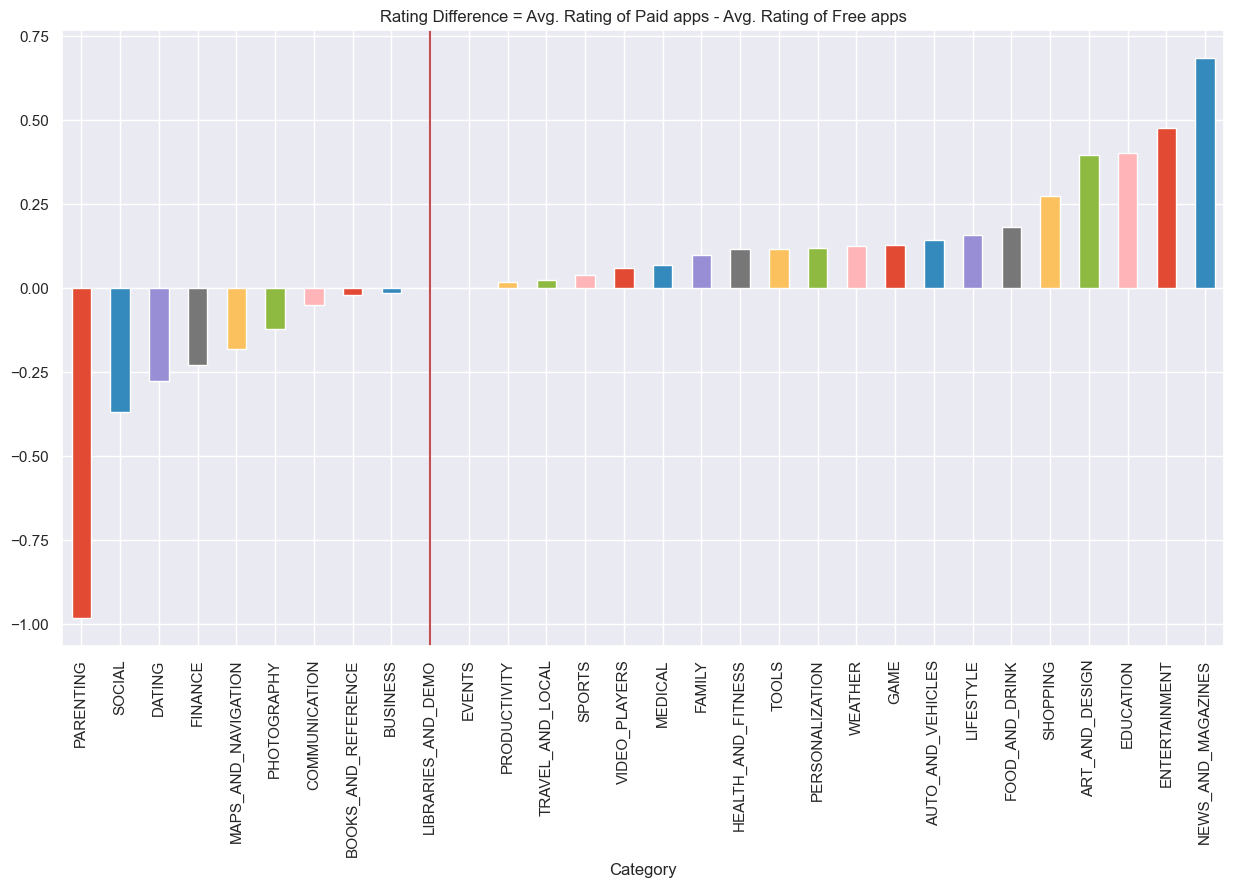

In [28]:
# group by 'Category', 'Type' to find average 'Rating' of each type in each categories
avg_rating_per_cat = df.groupby(['Category', 'Type'])['Rating'].mean()
avg_rating_per_cat = avg_rating_per_cat.unstack()
# find the Rating Difference = Avg. paid app rating - avg. Free app rating
avg_rating_diff = avg_rating_per_cat['Paid'] - avg_rating_per_cat['Free']
avg_rating_diff = avg_rating_diff.dropna().sort_values()

# visualizing
avg_rating_diff.plot.bar(color=color, title='Rating Difference = Avg. Rating of Paid apps - Avg. Rating of Free apps')
# line that present the change of difference from free to paid 
plt.axvline(np.where(avg_rating_diff >= 0)[0][0], color='r')

**Comment:** In most of categories, *paid* apps's rating are always higher than *free* apps. In categories that *free* apps surpass *paid* apps in user rating (the part where bar charts go downwards), we can see there are no big differences among the ratings. The exception is in **PARENTING**, average rating of the *free* apps is higher than *paid* apps nearly 1.0 point.

**How do users feel when using the paid apps vs free apps?**

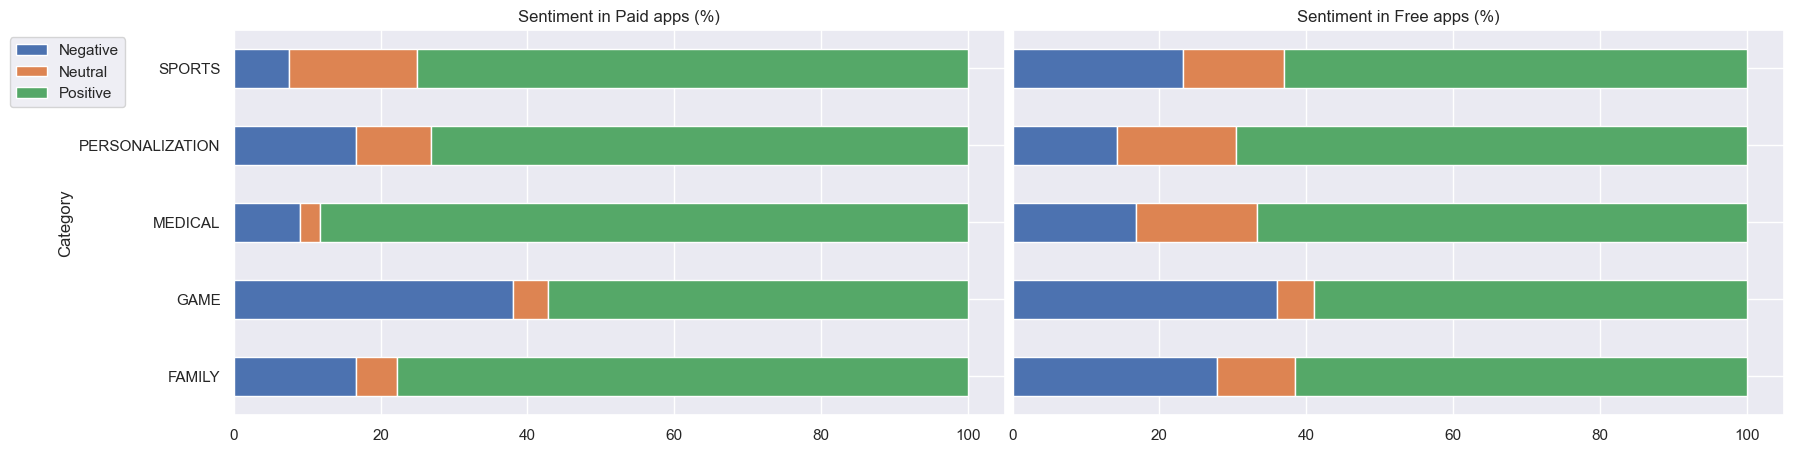

In [29]:
# import reviews dataframe
reviews_df = pd.read_csv('../Data/Processed/cleaned_reviews.csv')

# extract columns to display and pre-process
sub_df = df[df.Category.isin(['GAME', 'PERSONALIZATION', 'SPORTS', 'FAMILY', 'MEDICAL'])]
paid_df = sub_df[sub_df.Type == 'Paid']
free_df = sub_df[sub_df.Type == 'Free']

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
fig.subplots_adjust(wspace=0.01)

def sentiment_analyse(data, ax, title): # draw bar chart to show percentage of each kind of sentiment in each categories
    # merge reviews and df
    merged_df = pd.merge(data, reviews_df, on = "App", how = "inner")
    # find number of app per sentiments in each category
    grouped_sentiment_category_count = merged_df.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
    # find the total number of sentiment in each category
    grouped_sentiment_category_sum = merged_df.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()

    # merge them to one df
    new_df = pd.merge(grouped_sentiment_category_count, grouped_sentiment_category_sum, on=["Category"])
    # normalize sentiment to display percentage of each type
    new_df['SentimentNormalized'] = new_df.App/new_df.Sentiment_y * 100

    # drop unneccessary columns
    new_df = new_df[['Category', 'Sentiment_x', 'SentimentNormalized']]
    new_df = new_df.set_index(['Category', 'Sentiment_x']).unstack()

    # visualizing
    new_df.plot.barh(stacked=True, ax=ax, title=title, legend=False)
    
sentiment_analyse(paid_df, axes[0], 'Sentiment in Paid apps (%)')
sentiment_analyse(free_df, axes[1], 'Sentiment in Free apps (%)')
axes[0].legend(['Negative', 'Neutral', 'Positive'], bbox_to_anchor=(-0.3, 1), loc='upper left') 

**Comment:** As we can see, the *paid* app often get more positive comments in the same category when comparing to *free* app. Especially, **MEDICAL** paid apps get more than 80% positive reviews. Due to big amount of **GAME** installs and number of apps, the sentiment distribution in these 2 market seem similar and they both get the greatest percentage of negative comments - nearly 40%.

**What is the price range that most of the apps have?**

Quantile 0%: 0.99
Quantile 95%: 24.99
Categories have prices above $24.99: ['MEDICAL', 'SPORTS', 'FAMILY', 'TOOLS', 'LIFESTYLE', 'FINANCE', 'EVENTS', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'BUSINESS']


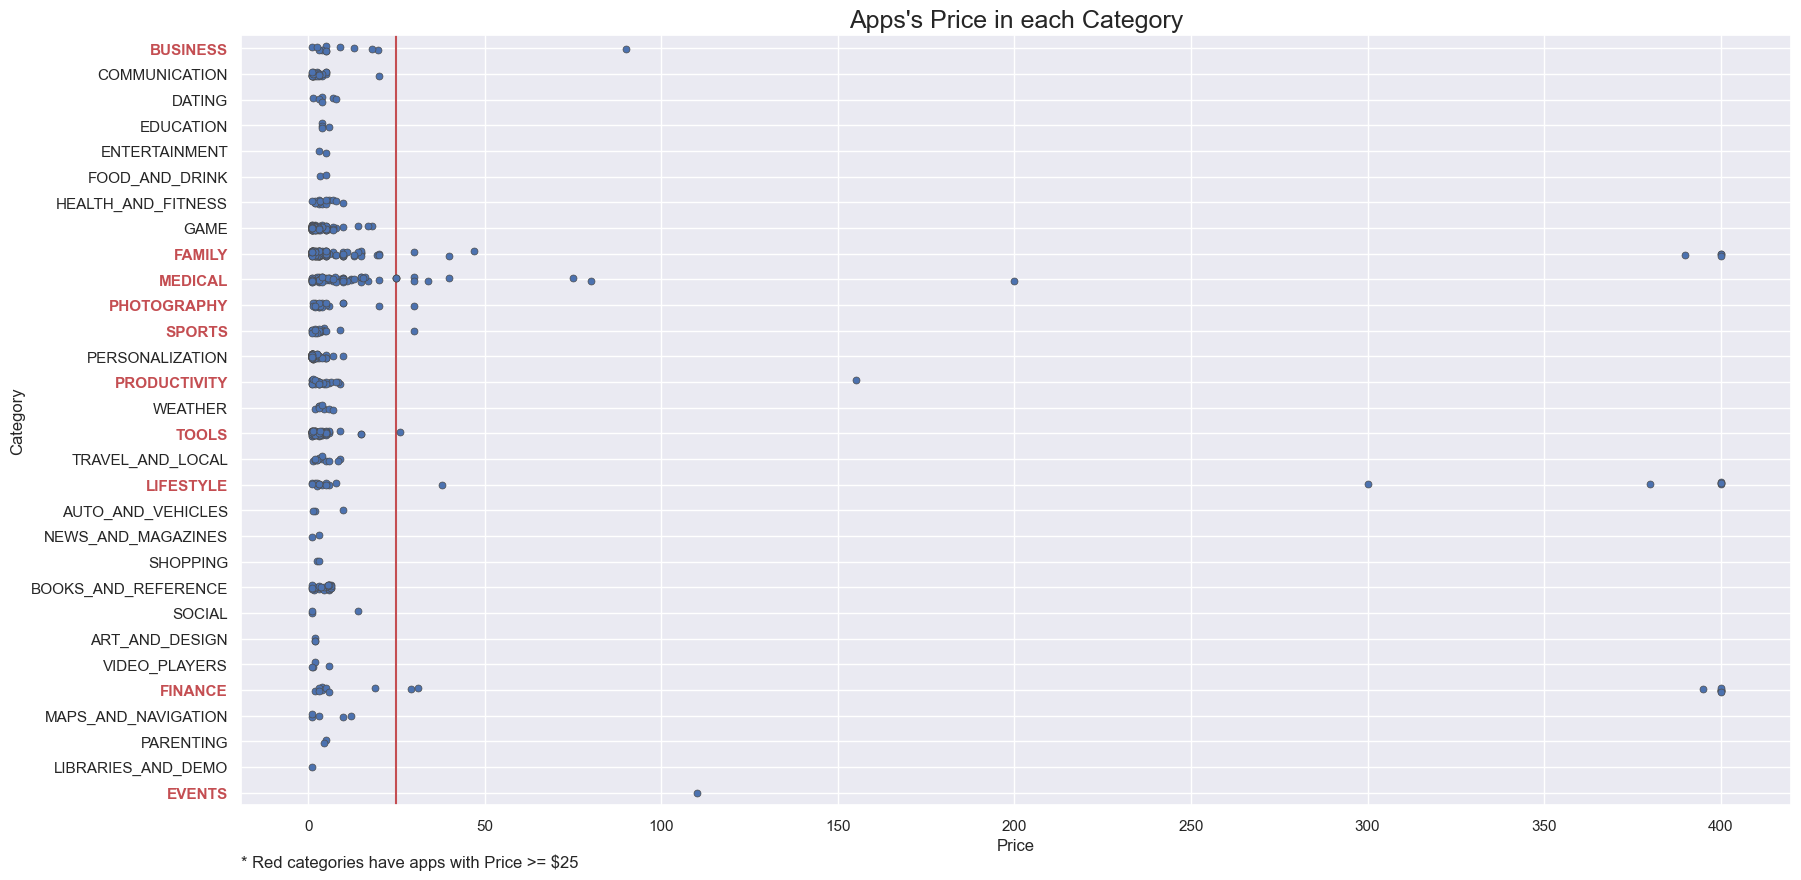

In [30]:
# get the paid app df and print the quantile range from 0 -> 0.95
df_paid = df[df.Price > 0]
quantile_0 = df_paid.Price.quantile(0)
quantile_95 = df_paid.Price.quantile(0.95)
print(f'Quantile 0%: {quantile_0}')
print(f'Quantile 95%: {quantile_95}')

# visualizing
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.stripplot(x="Price", y="Category", data=df_paid, linewidth=0.5, ax=ax, color='b')
ax.yaxis.grid(True) 
ax.set_title('Apps\'s Price in each Category', fontsize=18)
plt.axvline(quantile_95, color='r') # draw the red line splitting 2 ranges of price at x=quantile_95

# emphasis categories that has app's price > quantile_95
categories = df_paid['Category'].unique()
high_price_categories = df_paid[df_paid.Price > quantile_95]['Category'].unique()
print(f'Categories have prices above ${quantile_95}: {high_price_categories.tolist()}')
check = list(map(lambda e: True if e in high_price_categories else False, categories))
high_price_labels_idx = np.where(check)[0]
for idx in high_price_labels_idx:
    ax.get_yticklabels()[idx].set_color("r")
    ax.get_yticklabels()[idx].set_fontweight("bold")
p = ax.annotate('* Red categories have apps with Price >= $25', xy = (0, -0.08), xycoords='axes fraction')

**Comment:** 95% of paid apps have price in range \~\$1 to \~\$25. Categories that have prices above $25 are: **MEDICAL**, **SPORTS**, **FAMILY**, **TOOLS**, **LIFESTYLE**, **FINANCE**, **EVENTS**, **PRODUCTIVITY**, **PHOTOGRAPHY** and **BUSINESS**, which serve the purpose of self-improvement or work rather than simple entertainment or personal hobbies.

Personally, I believe that apps priced above $100 are excessively expensive! Let find out what are those apps?

In [31]:
df[df.Price > 100].sort_values('Price', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Updated_Month,Updated_Year
3469,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.300000,10000,Paid,400.00,Everyone,2018-05-03,5,2018
3327,most expensive app (H),FAMILY,4.300000,6,1.500000,100,Paid,399.99,Everyone,2018-07-16,7,2018
4402,I am Rich!,FINANCE,3.800000,93,22.000000,1000,Paid,399.99,Everyone,2017-12-11,12,2017
4417,I AM RICH PRO PLUS,FINANCE,4.000000,36,41.000000,1000,Paid,399.99,Everyone,2018-06-25,6,2018
4413,I am Rich,FINANCE,4.300000,180,3.800000,5000,Paid,399.99,Everyone,2018-03-22,3,2018
4408,I am rich (Most expensive app),FINANCE,4.100000,129,2.700000,1000,Paid,399.99,Teen,2017-12-06,12,2017
3465,💎 I'm rich,LIFESTYLE,3.800000,718,26.000000,10000,Paid,399.99,Everyone,2018-03-11,3,2018
4403,I am rich(premium),FINANCE,3.500000,472,0.942383,5000,Paid,399.99,Everyone,2017-05-01,5,2017
4406,I Am Rich Pro,FAMILY,4.400000,201,2.700000,5000,Paid,399.99,Everyone,2017-05-30,5,2017
4400,I Am Rich Premium,FINANCE,4.100000,1867,4.700000,50000,Paid,399.99,Everyone,2017-11-12,11,2017


**Comment:** Most of the extremely expensive apps tend to be some pranks (like the infamous "I'm Rich" sample). Surprisingly, despite their high prices, these apps manage to get a significant number of downloads. Conversely, there are seemingly more serious apps like **EP Cook Book**, **cronometra-br**, or **BP Fitness Lead Scanner** that struggle to attract attention, receiving only 1 or even 0 downloads. We belive that most of people would be not willing to pay for that price, except for the really crazy rich ones.

**What is the average price (given by seller) in each categories?**

<Axes: title={'center': 'Avg. Price in each Category (by sellers)'}, xlabel='Avg. Price ($)', ylabel='Category'>

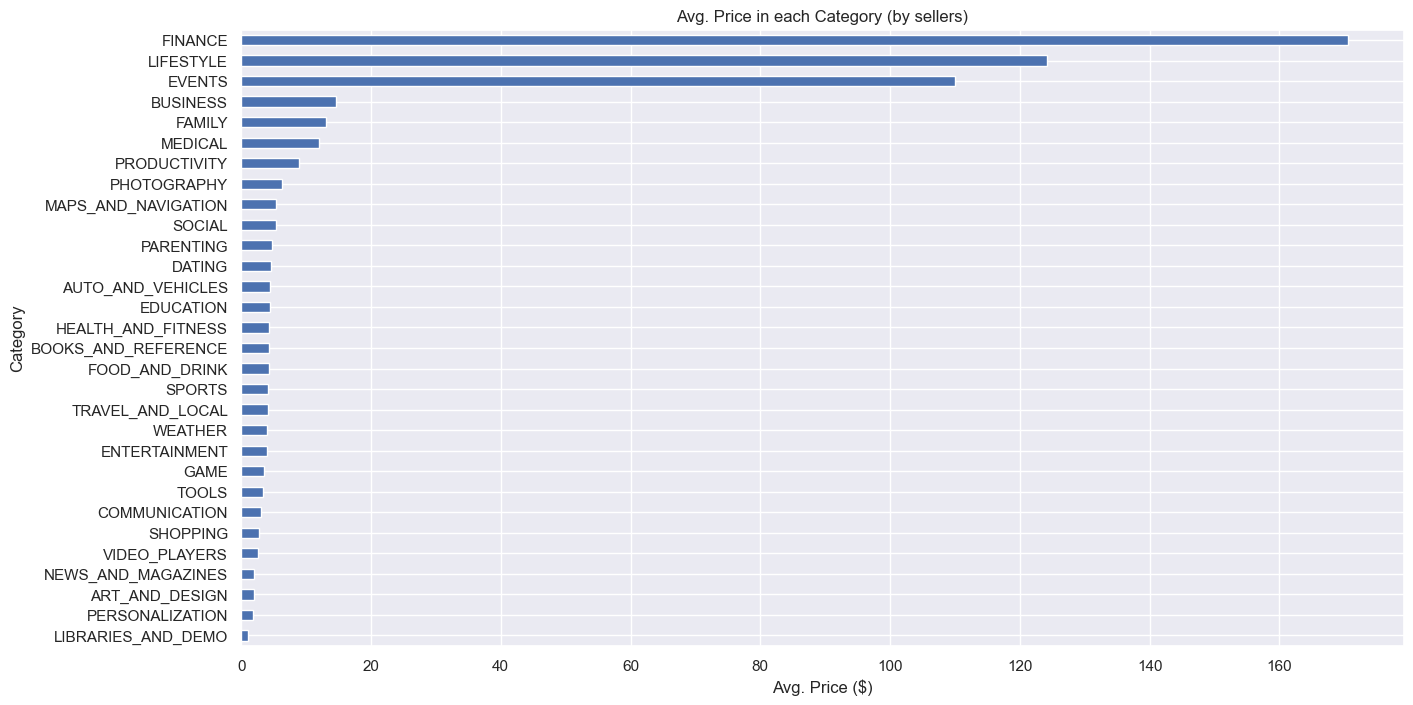

In [32]:
mean_price_df = df[df.Type == 'Paid'].groupby('Category')['Price'].mean()
mean_price_df = mean_price_df.sort_values(ascending=True)
mean_price_df.plot.barh(xlabel='Avg. Price ($)', title="Avg. Price in each Category (by sellers)")

**Comment:** **FINANCE** and **LIFESTYLE** both have those "I am rich" apps, their average price are pulled up too high. On the other side, in **EVENTS**, there is only one app reach the price > $100. You can watch the above scatter plot for more information.

Let remove those junk apps and check it again.

<Axes: title={'center': 'Avg. Price in each Category (by sellers, without "I am rich" and "EVENTS")'}, xlabel='Avg. Price ($)', ylabel='Category'>

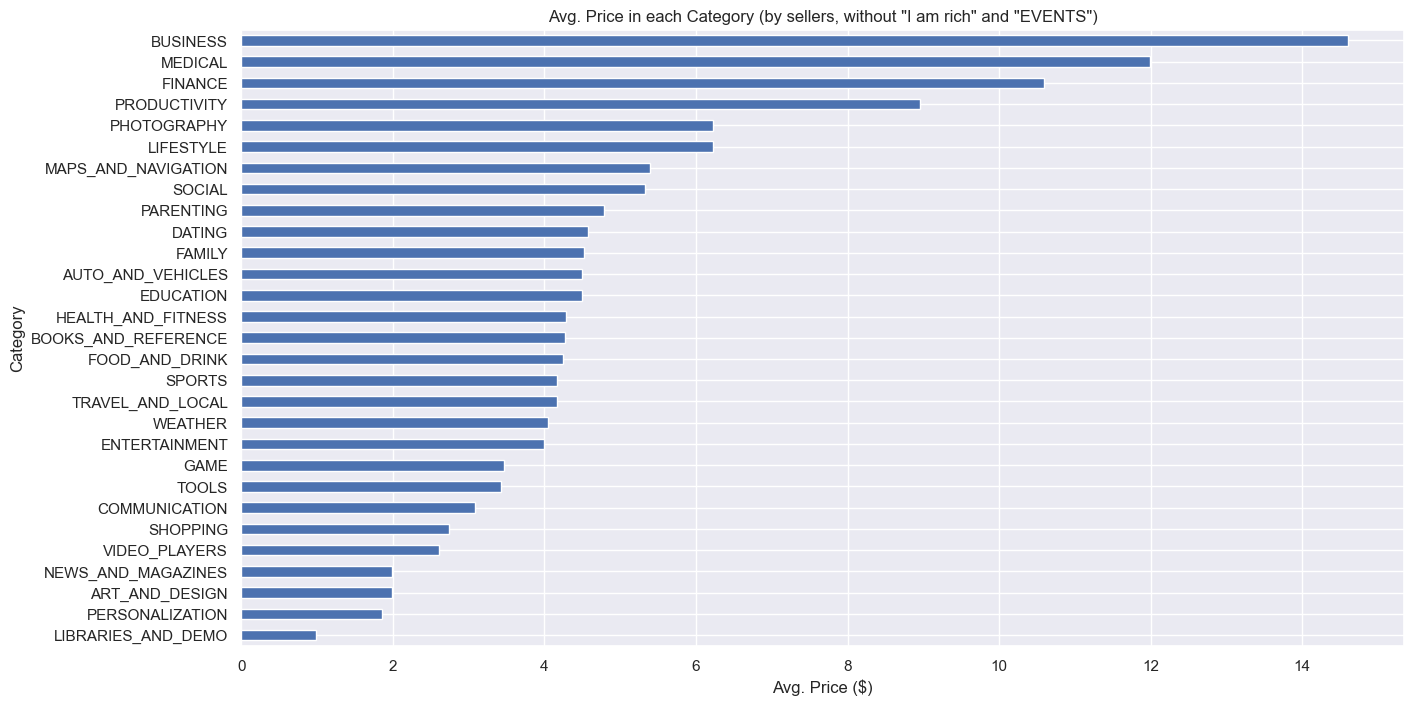

In [33]:
mean_price_df = df[(df.Price < 250) & (df.Type == 'Paid') & (df.Category != 'EVENTS')].copy() # most of the "i am rich" has price greater than 250
mean_price_df = mean_price_df.groupby('Category')['Price'].mean() 
mean_price_df = mean_price_df.sort_values(ascending=True)
mean_price_df.plot.barh(xlabel='Avg. Price ($)', title="Avg. Price in each Category (by sellers, without \"I am rich\" and \"EVENTS\")")

**Comment:** Now the chart seem more reasonable. **BUSINESS**, **MEDICAL** and **FINANCE** have the highest average prices due to their properties serving for professional work but their price does not overcome $15.

Those excessively expensive apps pique our curiosity. Let find out:

**Which apps generate the highest revenue?**

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Updated_Month,Updated_Year,Revenue
1743,Minecraft,FAMILY,4.5,2376564,19.0,10000000,Paid,6.99,Everyone 10+,2018-07-24,7,2018,69900000.0
4396,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,2018-01-12,1,2018,39999000.0
4400,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,2017-11-12,11,2017,19999500.0
3208,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,Mature 17+,2018-07-12,7,2018,9900000.0
6370,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,6.99,Mature 17+,2015-03-21,3,2015,6990000.0


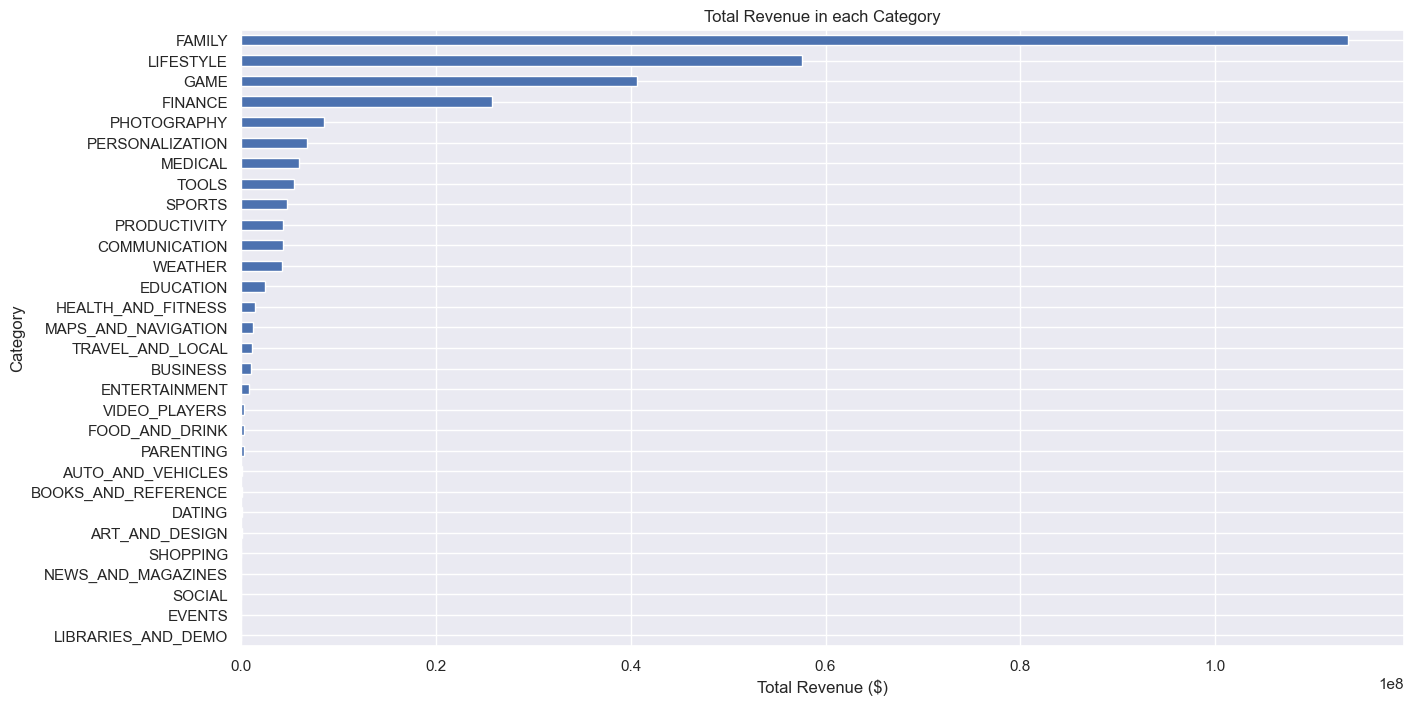

In [34]:
#pre-processing
paid_df = df[(df.Type == 'Paid')].copy()
paid_df['Revenue'] = paid_df['Price'] * paid_df['Installs'] # revenue = price * number of install
paid_df.sort_values('Revenue', ascending=False, inplace=True)

# groupby 'Category' to find total Revenue
revenue_cat_paid = paid_df.groupby('Category')['Revenue'].sum()
revenue_cat_paid.sort_values(ascending=True, inplace=True)

# visualizing
revenue_cat_paid.plot.barh(title="Total Revenue in each Category")
plt.xlabel('Total Revenue ($)')
paid_df.head(5)

**Comment:** As we can see, **FAMILY** category is worth for you to try if you seek high revenue during startup because the total revenue of **FAMILY** is as twice as the next position **LIFESTYLE**. Following right behind are  **GAME**, and **FINANCE** categories.

After this step, we recognize that there are apps that don't have any installs. The above average prices are just created by the sellers! 

**How about the average price that users are really willing to pay in each category?**

*Therefore, let's calculate the average price again based on the number of installs*.

<Axes: title={'center': 'Avg. Price in each Category (by users)'}, xlabel='Avg. Price ($)', ylabel='Category'>

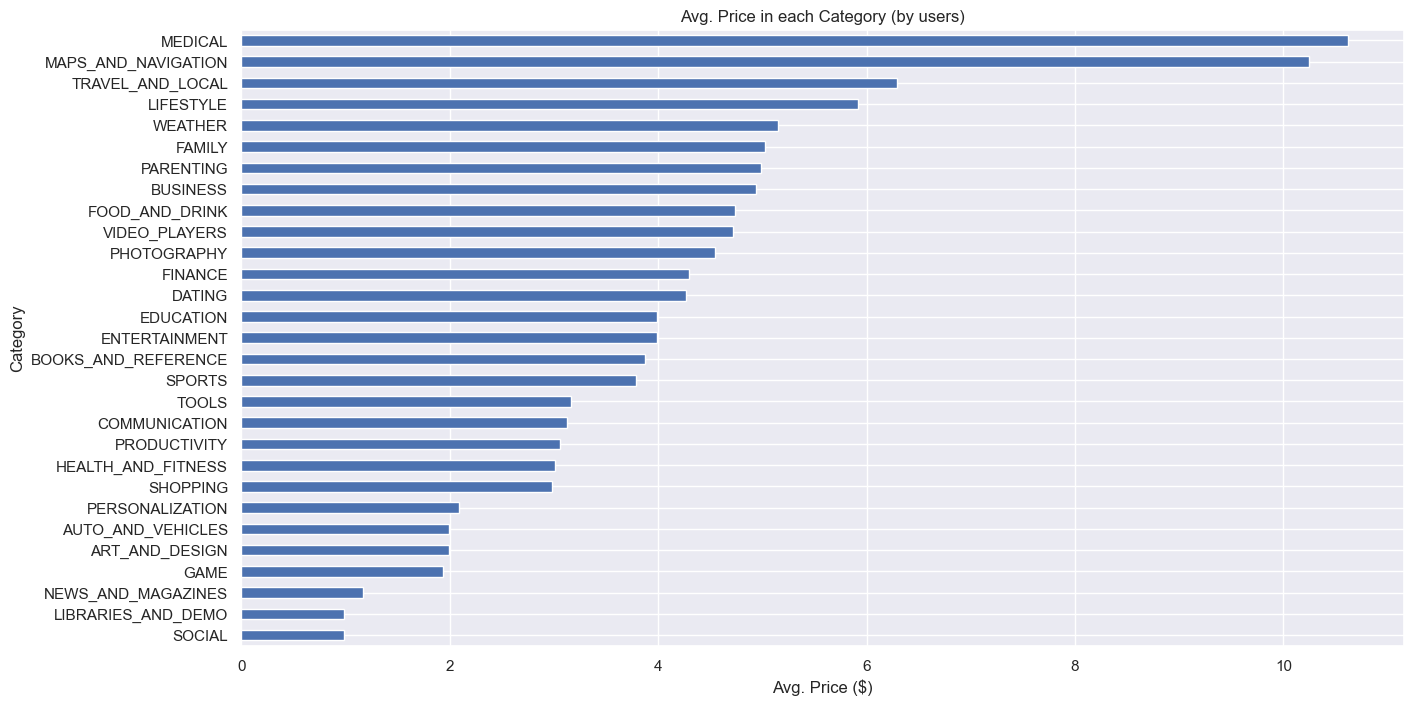

In [35]:
# pre-processing
paid_df = df[(df.Price < 250) & (df.Type == 'Paid') & (df.Category != 'EVENTS')].copy() # drop app with outliers
paid_df['Revenue'] = paid_df['Price'] * paid_df['Installs'] # revenue = price * number of install
paid_df.sort_values('Revenue', ascending=False, inplace=True)

cat_revenue = paid_df.groupby('Category')['Revenue'].sum() # total revenue per category
cat_installs = paid_df.groupby('Category')['Installs'].sum() # total install per category
user_avg_price = cat_revenue / cat_installs # user's avg.price

# visualizing
user_avg_price.sort_values().plot.barh(title='Avg. Price in each Category (by users)', xlabel='Avg. Price ($)')

**Comment:** Now we can see, user are often willing to pay the high prices for apps in **MEDICAL** and **MAPS_AND_NAVIGATION**, however, the average number is not overcome $12. Apps already available for *free* like in **NEWS_AND_MAGAZINES**, **LIBRARIES_AND_DEMO** and **SOCIAL** can't not earn much in the market of *paid* apps without having a large amount of installs like **GAME**.

Let's have a quick look through the top 5 highest reveneu applications in top 4 category.

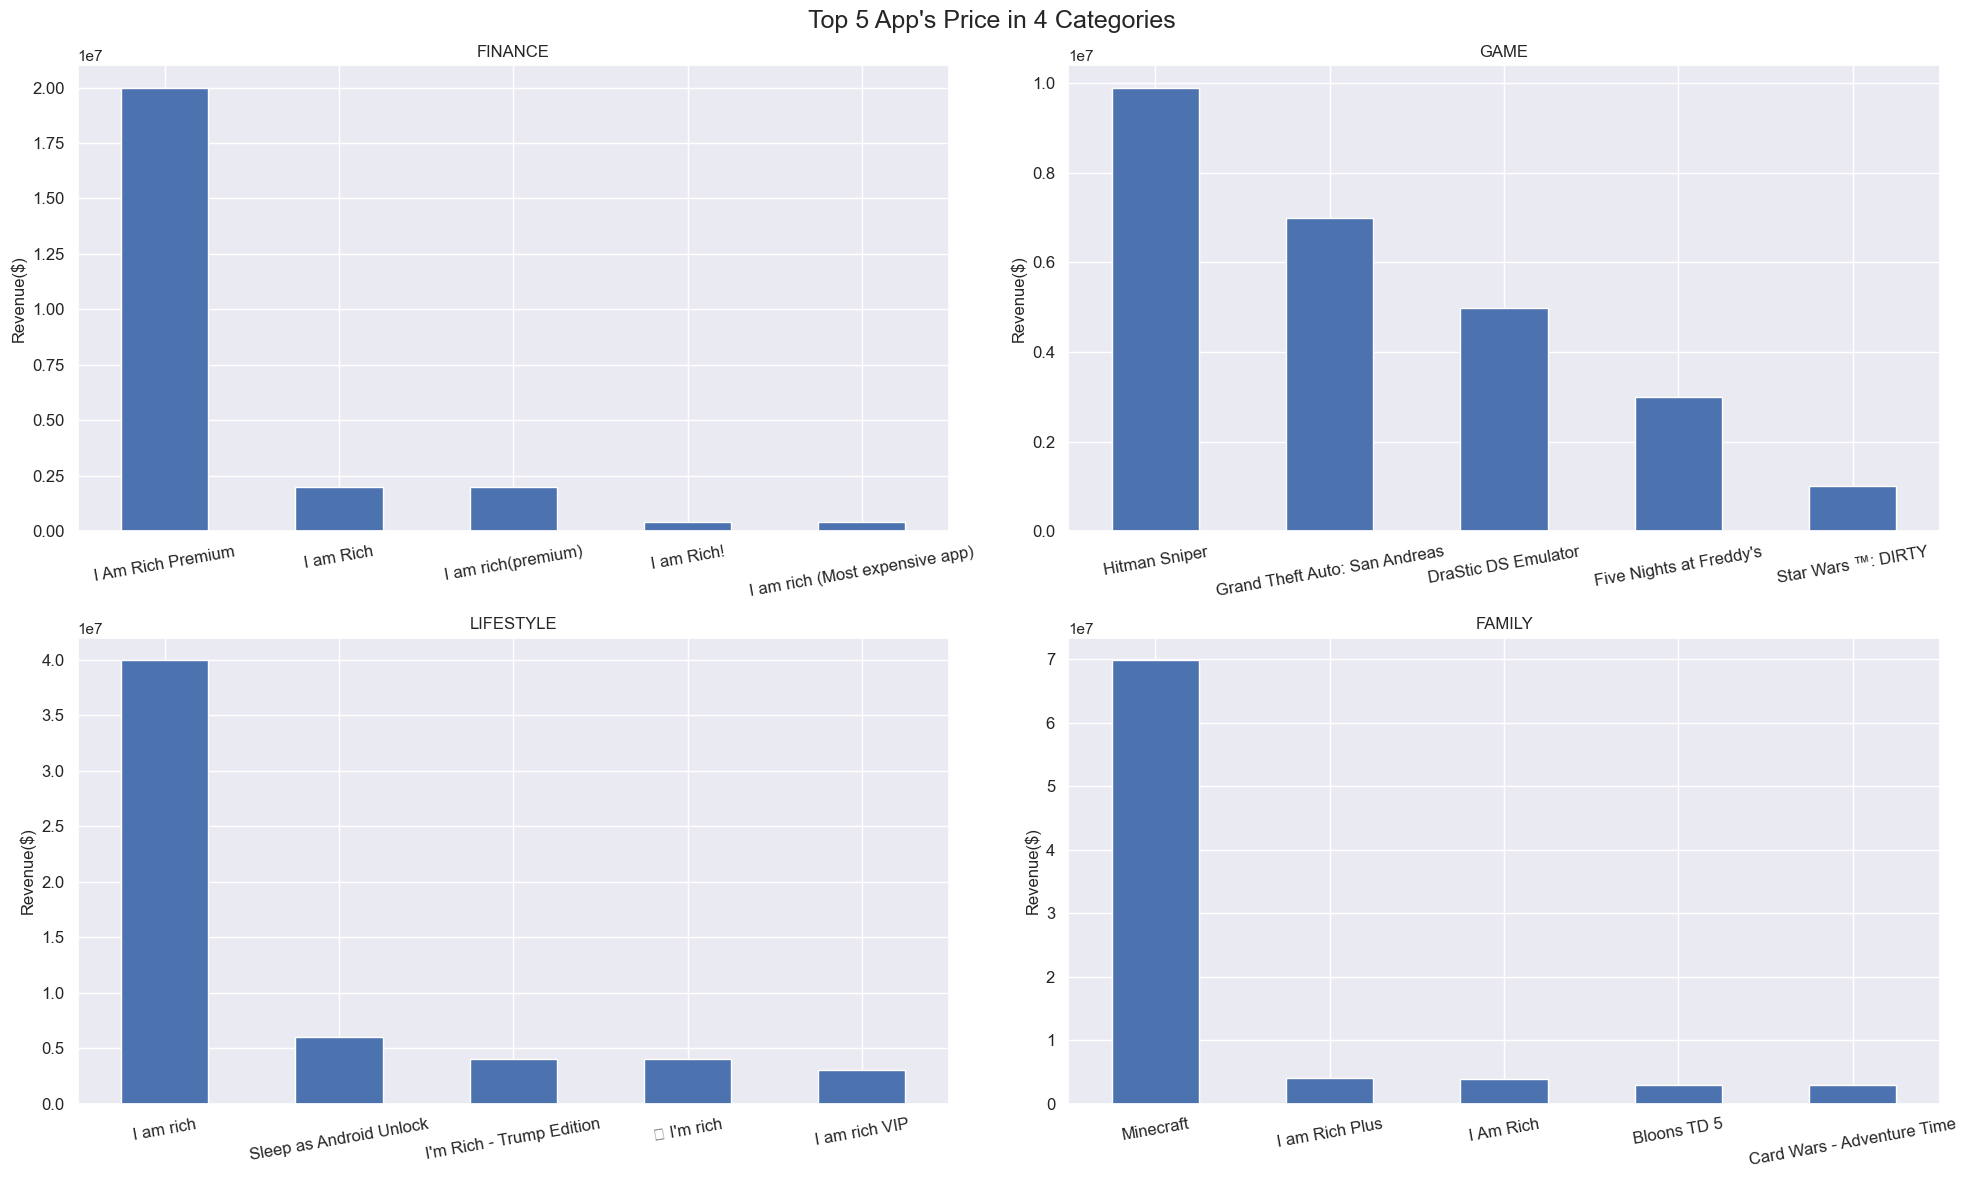

In [36]:
#pre-processing
paid_df = df[(df.Type == 'Paid')].copy()
paid_df['Revenue'] = paid_df['Price'] * paid_df['Installs'] # revenue = price * number of install
paid_df.sort_values('Revenue', ascending=False, inplace=True)

revenue_cat_paid = paid_df.groupby('Category')['Revenue'].sum()
revenue_cat_paid.sort_values(ascending=True, inplace=True)

# visualizing
fig, axes = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle("Top 5 App's Price in 4 Categories", fontsize=18)
top_cates = revenue_cat_paid.index[-4:]
for cate, ax in zip(top_cates, axes.ravel()):
    paid_df[paid_df.Category == cate].head(5).plot.bar(ax=ax, x='App', xlabel='',
                                                       y='Revenue', ylabel='Revenue($)', title=cate, rot=10, legend=False, fontsize=12)
fig.tight_layout()

**Comment:** Game-related apps often get the greatest revenue and what shock us is that "I am rich" really works?!

#### **CONCLUSION:**
1. Most apps on the Google Play Store are *free*, and among these, the **FAMILY** category accounts for the majority of applications on the Google Play Store in both free and paid application markets. However, just because a category has many apps doesn't mean it has the most downloads. For example, despite **FAMILY** has the largest number of applications in the Store, the largest number of installs is belong to **GAME** apps. 

1. *Paid* apps often get higher rating than *free* apps in most of categories. Although, there are categories that *free* app surpass *paid* apps in rating, however, the difference is not significant, which means that *paid* apps tend to offer a higher level of user satisfaction. The sentiment of *paid* apps are often better than *free* apps, especially in **MEDICAL**.

2. Most of the app's price is in range \~\$1 to \~\$25. However, the reasonable price for an application that most people accepted is better below $12.

## 4. Reflection

**a. What difficulties have you encountered?**

- **Ho Dinh Duy Luc:** The `Google play Store Apps` dataset was not our first priority at the beginning days but another one. At that time, I faced a lot of difficulties such as lack of domain knowledge, technique skills... but the most challenging to me is that how to utilize the dataset at most to give out valuable insights. The lack in experience and knowledge is the greatest barrier hind me in this project.  
- **Vo Phu Han:** Our dataset is easy to understand, however, personally, I think it is really hard to make questions that're intersting for other viewers. Our visualization is pretty basic, we used mostly bar chart to visualize information. However, thanks to my teamate `Luc`, we have together completed the final project.

**b. What have you learned?**

- **Ho Dinh Duy Luc:** Every process in the project let me know that I'm on my way to become better. I have applied a lots which learned in `Programming for Data Science` (course by Teacher Pham Trong Nghia) in this project such as Python, Matplotlib, Git,... Besides, this project is a great chance for me to have a deeper knowledge in this topic. Especially, I also learn a lot from my helpful teamate `Han`. He has really an interesting mindset and high standard in all extent.
- **Vo Phu Han:** Despite all the difficulties I have mentioned above, I believe we have tried our best to fulfil this project. I've acquired fundamental skills in dataset analysis, data collection, exploration, pre-processing, visualization, and analysis. After finishing the project, it's necessary to consider the product ourself, identifying issues to improve the future outcomes.

**c. If you had more time, what would you do?**

- **Ho Dinh Duy Luc:** As this dataset was scrawled in 2018, everythings can be differed nowsaday. If have more time, I want to create my up-to-date dataset legally. Then analyze it, and give out more real, new information to people.  
- **Vo Phu Han:** Because our data is pretty simple, if we have had more time, we would've searched for additional datasets to supplement our main one. This could have helped us gather more detailed information about apps, like people's opinions on their favorite apps or the time they spend using them.

## 5.References

- Slides, lectures and Practice labs in Programming for Data Science course by Teacher Pham Trong Nghia  
- Slides, lectures and Practice labs  in Introduction to Data Science course by Teacher Le Ngoc Thanh  
- Matplotlib document: [Documents](https://matplotlib.org/)  
- Seaborn document [Documents](https://seaborn.pydata.org/)